# 1. Import Library

In [3]:
# nltk untuk nlp
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

# Import Library 
import pandas as pd

# Pickle untuk save model
import pickle

# Preprocessing (sklearn)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import TruncatedSVD

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Import Dataset

In [ ]:
# Melakukan perulangan untuk import data
df = pd.read_csv('./data/phishing_dataset.csv')

# 3. Understanding Dataset

In [5]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [6]:
# Menampilkan 5 data teratas
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [7]:
# Menampilkan jumlah persebaran data pada kolom 'Email Type'
df['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

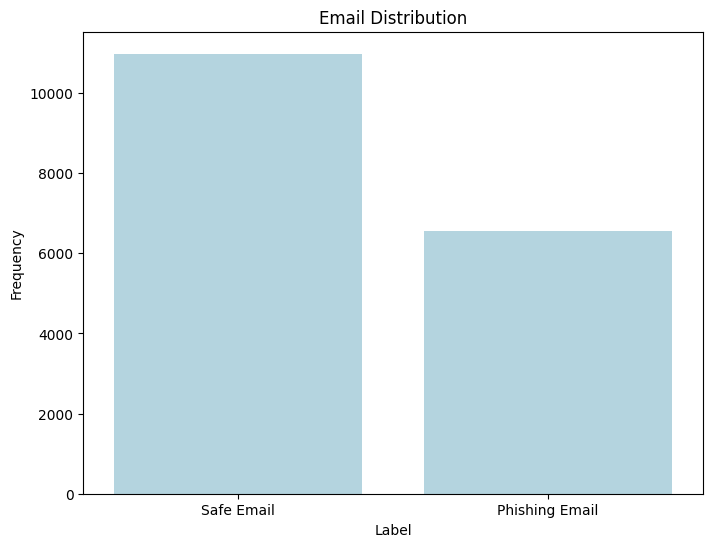

In [68]:
# Plotting persebaran data pada kolom 'Email Type'
label_counts = df['Email Type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, color='lightblue')
plt.title('Email Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Melihat jumlah baris dan kolom pada dataset
df.shape

(18650, 3)

# 4. Cleaning Data

### Data Cleaning

#### Menghapus Kolom yang Tidak Diperlukan

In [10]:
# Data Cleaning, Menghapus kolom yang tidak diperlukan
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


#### Cek Data Duplikat

In [11]:
# Mengecek duplikasi data
df.duplicated().sum()
print(f"Jumlah data duplikat: {df.duplicated().sum()} data")

Jumlah data duplikat: 1111 data


In [12]:
# Menghapus data duplikat
df = df.drop_duplicates()

In [13]:
# Cross check data duplikat
df.duplicated().sum()
print(f"Jumlah data duplikat: {df.duplicated().sum()} data")

Jumlah data duplikat: 0 data


#### Cek Nilai Null

In [71]:
# Mengecek nilai null pada dataset
print(f"Jumlah nilai null adalah: {df.isna().sum().sum()} data")

Jumlah nilai null adalah: 0 data


In [15]:
# Menghapus baris yang memiliki nilai null
df = df.dropna()

In [70]:
# Melakukan cross check data null pada dataset
print(f"Jumlah nilai null adalah: {df.isna().sum().sum()} data")

Jumlah nilai null adalah: 0 data


In [17]:
df.shape

(17538, 2)

### Stopwords Removal

In [18]:
sample_data = "Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you."

In [19]:
# Melakukan stopword removal
# Menghapus kata-kata yang tidak memiliki makna yang relevan
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_data = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_data)

print(f"Sebelum: {sample_data}")
print(f"Sesudah: {remove_stopwords(sample_data)}")

Sebelum: Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.
Sesudah: Dear customer , account flagged suspicious activity . Please verify credentials immediately . Thank .


### Case Folding

In [20]:
# Melakukan proses case folding
def case_folding(text):
    return text.lower()

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {case_folding(sample_data)}")

Sebelum : Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.
Sesudah : dear customer, your account has been flagged for suspicious activity. please verify your credentials immediately. thank you.


### Lemmatization

In [21]:
# Melakukan proses lemmatization
# Mengubah kata-kata menjadi kata dasar dengan bantuan POS tagging
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatization(text):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    pos_tags = pos_tag(word_tokens)
    lemmatized_data = []
    
    for word, tag in pos_tags:
        pos = get_wordnet_pos(tag) or wordnet.NOUN
        lemmatized_data.append(lemmatizer.lemmatize(word, pos))
    
    return ' '.join(lemmatized_data)

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {lemmatization(sample_data)}")


Sebelum : Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.
Sesudah : Dear customer , your account have be flag for suspicious activity . Please verify your credential immediately . Thank you .


### Remove Symbol

In [22]:
# Menghapus karakter khusus
def remove_special_character(text):
    return ''.join(e for e in text if e.isalnum() or e.isspace())

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {remove_special_character(sample_data)}")

Sebelum : Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.
Sesudah : Dear customer your account has been flagged for suspicious activity Please verify your credentials immediately Thank you


### Tokenization

In [23]:
# Melakukan tokenisasi
def tokenization(text):
    return word_tokenize(text)

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {tokenization(sample_data)}")

Sebelum : Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.
Sesudah : ['Dear', 'customer', ',', 'your', 'account', 'has', 'been', 'flagged', 'for', 'suspicious', 'activity', '.', 'Please', 'verify', 'your', 'credentials', 'immediately', '.', 'Thank', 'you', '.']


# 5. Preprocessing Data

### Proses Preprocessing Data

In [24]:
# Melakukan proses preprocessing
def preprocess_text(text):
    text = remove_special_character(text)
    text = case_folding(text)
    text = remove_stopwords(text)
    text = lemmatization(text)
    tokens = tokenization(text)
    return ' '.join(tokens)

In [25]:
print(f"Sebelum : {sample_data}")
print(f"Sesudah : {preprocess_text(sample_data)}")

Sebelum : Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.
Sesudah : dear customer account flag suspicious activity please verify credential immediately thank


### Menerapkan Preprocessing pada Dataset

In [26]:
df['Email Text'] = df['Email Text'].apply(preprocess_text)

In [27]:
# Menampilkan dataset setelah dilakukan preprocessing
df.head(10)

,Email Text,Email Type
0,6 1100 disc uniformitarianism 1086 sex lang di...,Safe Email
1,side galicismos galicismo spanish term name im...,Safe Email
2,equistar deal ticket still available assist ro...,Safe Email
3,hello hot lil horny toy one dream open mind pe...,Phishing Email
4,software incredibly low price 86 low drapery s...,Phishing Email
5,global risk management operation sally congrat...,Safe Email
6,sun aug 11 2002 111747am 0100 wintermute menti...,Safe Email
7,entourage stockmogul newsletter ralph velez ge...,Phishing Email
8,owe lot money dear applicant review upon recei...,Phishing Email
9,coastal deal exxon participation project agree...,Safe Email


# 6. Exploratory Data Analysis (EDA)

### Chart 1 - Data Phishing vs Non Phishing

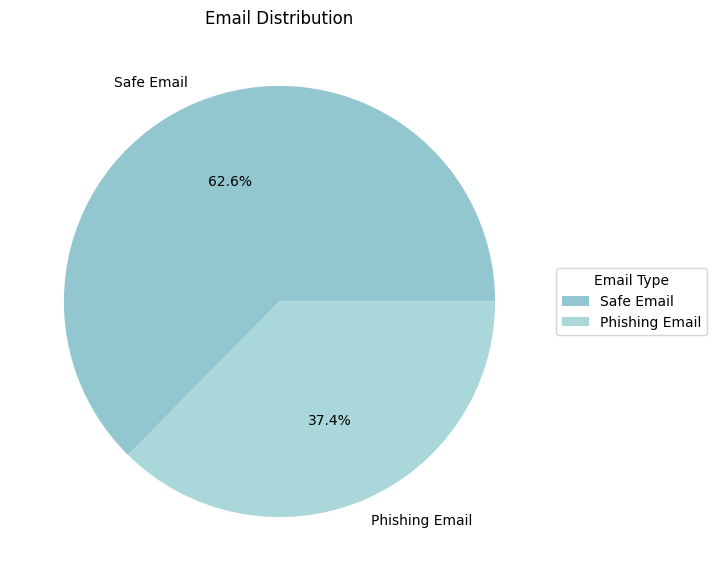

In [69]:
# Visualisasi Distribusi Data Menggunakan pie chart
label = df['Email Type'].value_counts().index

fig = plt.figure(figsize=(10, 7))
plt.pie(df['Email Type'].value_counts(), labels=label, autopct='%1.1f%%', colors=['#92C7CF','#AAD7D9','#99ff89'])
plt.title('Email Distribution')
legend = plt.legend(title='Email Type', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Chart 2 - Wordcloud

#### Kata yang Sering Muncul pada Email Phishing


In [29]:
phishing_data = df[df['Email Type'] == 'Phishing Email'].copy()

In [30]:
phishing_data.head()

,Email Text,Email Type
3,hello hot lil horny toy one dream open mind pe...,Phishing Email
4,software incredibly low price 86 low drapery s...,Phishing Email
7,entourage stockmogul newsletter ralph velez ge...,Phishing Email
8,owe lot money dear applicant review upon recei...,Phishing Email
10,make beg give everynight please partner much g...,Phishing Email


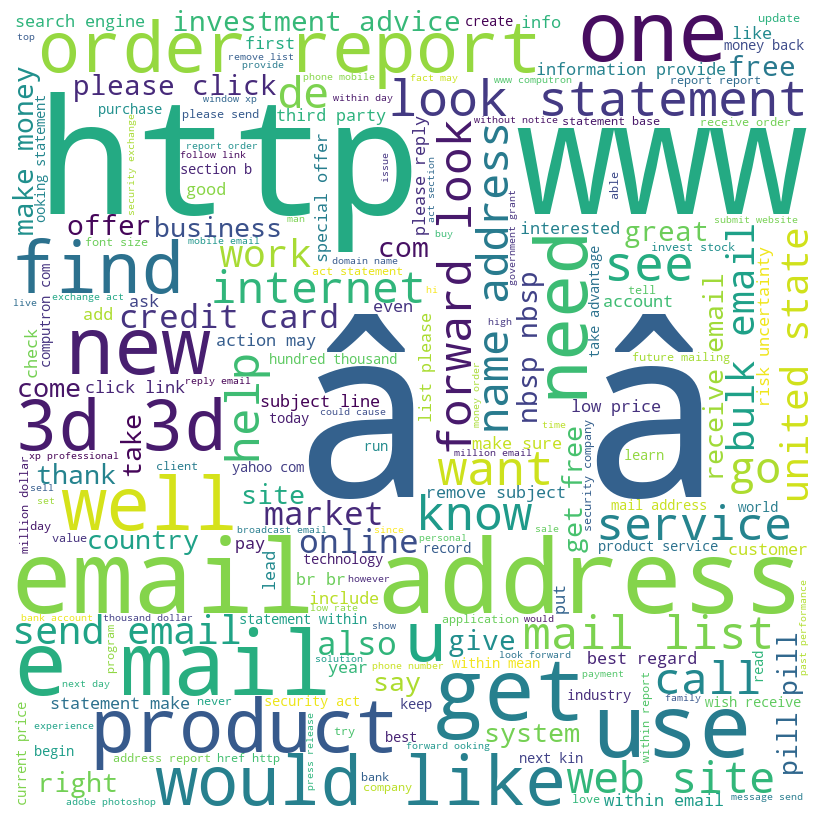

In [31]:
from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(phishing_data['Email Text']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Kata yang Sering Muncul pada Email Non Phishing


In [32]:
non_phishing_data = df[df['Email Type'] == 'Safe Email'].copy()

In [33]:
non_phishing_data.head()

,Email Text,Email Type
0,6 1100 disc uniformitarianism 1086 sex lang di...,Safe Email
1,side galicismos galicismo spanish term name im...,Safe Email
2,equistar deal ticket still available assist ro...,Safe Email
5,global risk management operation sally congrat...,Safe Email
6,sun aug 11 2002 111747am 0100 wintermute menti...,Safe Email


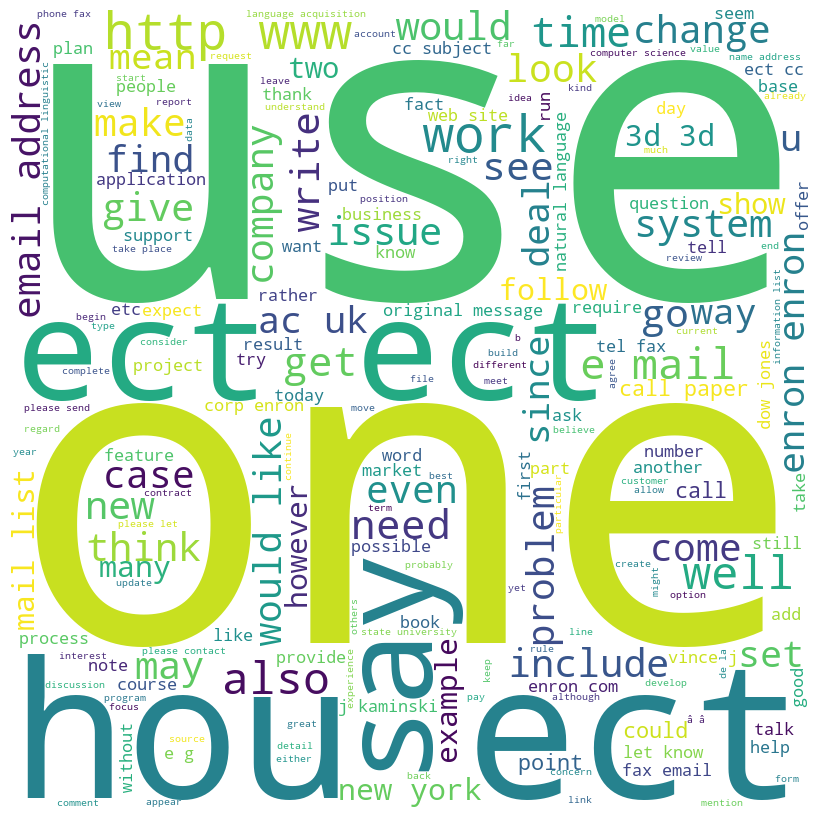

In [34]:
stop_words = set(stopwords.words('english'))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(non_phishing_data['Email Text']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# 7. Data Preparation

## Feature Engineering

### Word Frequency

In [35]:
# Menghitung berapa kali kata muncul pada dataset
from collections import Counter

def count_words(text):
    words = text.split()
    return Counter(words)

phishing_words = count_words(' '.join(phishing_data['Email Text']))
non_phishing_words = count_words(' '.join(non_phishing_data['Email Text']))

In [36]:
# Menampilkan 10 kata yang paling sering muncul pada email phishing
phishing_words.most_common(10)

[('email', 6970),
 ('â', 6307),
 ('company', 4828),
 ('get', 4637),
 ('make', 4580),
 ('u', 4222),
 ('1', 4199),
 ('free', 4063),
 ('order', 3995),
 ('report', 3858)]

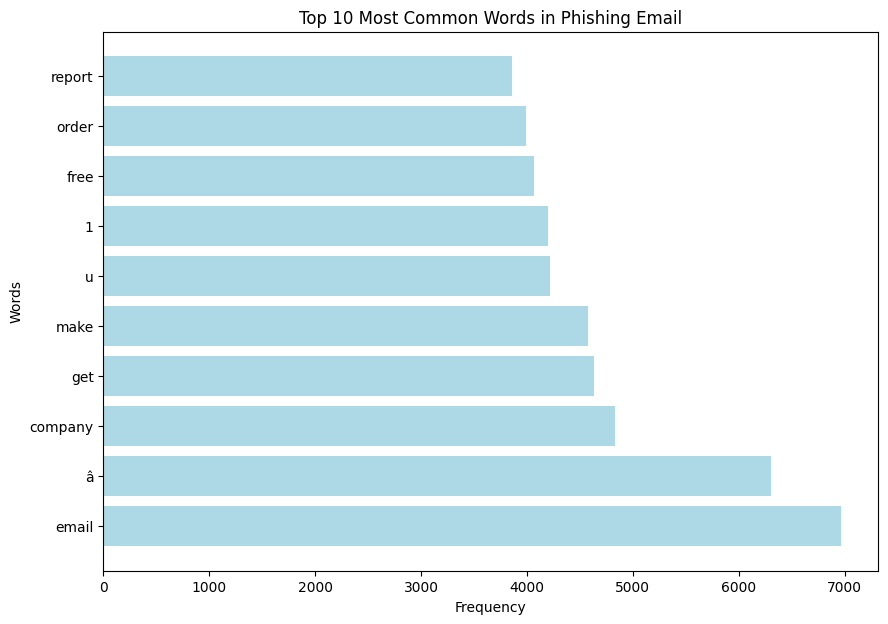

In [67]:
# Visualisasi kata yang paling sering muncul pada email phishing
plt.figure(figsize=(10, 7))
plt.barh(*zip(*phishing_words.most_common(10)), color='lightblue')
plt.title('Top 10 Most Common Words in Phishing Email')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [38]:
# Menampilkan 10 kata yang paling sering muncul pada email non-phishing
non_phishing_words.most_common(10)

[('language', 21383),
 ('enron', 17838),
 ('university', 17340),
 ('1', 13778),
 ('use', 12170),
 ('one', 11784),
 ('email', 11193),
 ('paper', 10928),
 ('ect', 10900),
 ('information', 10763)]

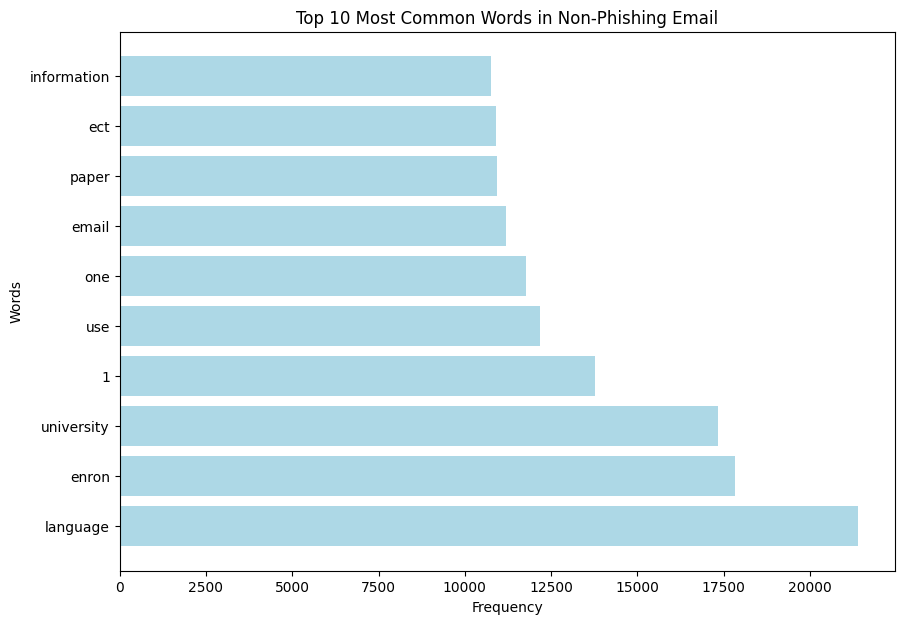

In [66]:
# Visualisasi kata yang paling sering muncul pada email non-phishing
plt.figure(figsize=(10, 7))
plt.barh(*zip(*non_phishing_words.most_common(10)), color='lightblue')
plt.title('Top 10 Most Common Words in Non-Phishing Email')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

### Data Transformation using TF-IDF

In [40]:
# Melakukan Transformasi Data Menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Email Text'])
y = df['Email Type']

In [41]:
# Return the feature names
feature_names = tfidf.get_feature_names_out()

# Menampilkan 10 feature names
feature_names[:10]

array(['00', '000', '0000', '000000', '00000000', '000000000003619',
       '000000000005168', '000000000005409', '000000000005412',
       '000000000005413'], dtype=object)

### Data Splitting

In [42]:
# Melakukan pemisahan data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = X_train.shape[0]
test_data = X_test.shape[0]

print(f"Jumlah data training: {train_data}")
print(f"Jumlah data testing: {test_data}")
print(f"Total data: {train_data + test_data}")

Jumlah data training: 14030
Jumlah data testing: 3508
Total data: 17538


# 8. Modelling

## Model Training

### 1. Support Vector Machine (SVM)

In [43]:
# Melakukan klasifikasi menggunakan Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Melakukan evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Menyimpan hasil classification report ke dalam file CSV
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('./data/classification_report.csv')

Akurasi: 0.9823261117445838
                precision    recall  f1-score   support

Phishing Email       0.98      0.97      0.98      1295
    Safe Email       0.98      0.99      0.99      2213

      accuracy                           0.98      3508
     macro avg       0.98      0.98      0.98      3508
  weighted avg       0.98      0.98      0.98      3508



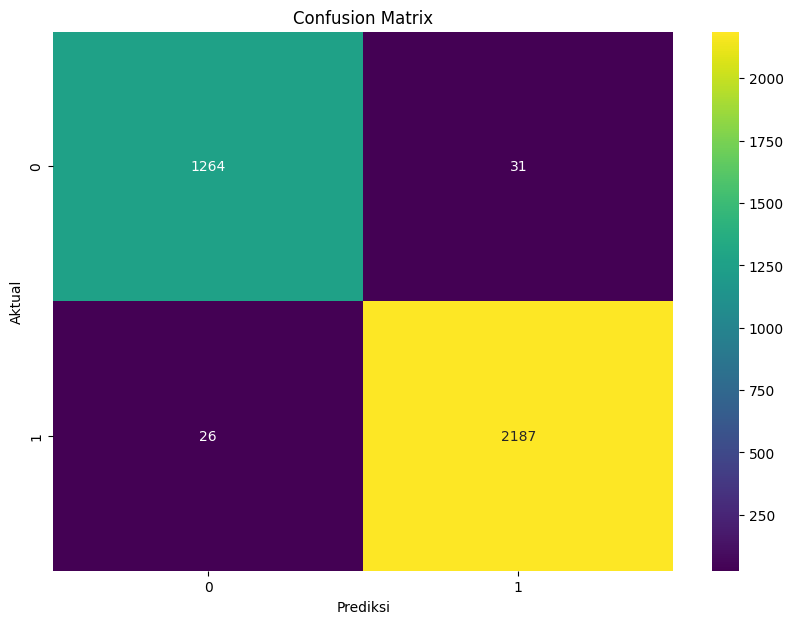

In [65]:
# Visualisasi Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [45]:
# Menyimpan model ke dalam file menggunakan pickle
with open('./models/dataset_2/svm_model.pkl', 'wb') as file:
    pickle.dump(svm, file)

### 2. Decision Tree

In [46]:
# Melakukan klasifikasi menggunakan Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Melakukan evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Menyimpan hasil classification report ke dalam file CSV
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('./data/classification_report_DT.csv')

Akurasi: 0.9210376282782212
                precision    recall  f1-score   support

Phishing Email       0.88      0.91      0.89      1295
    Safe Email       0.94      0.93      0.94      2213

      accuracy                           0.92      3508
     macro avg       0.91      0.92      0.92      3508
  weighted avg       0.92      0.92      0.92      3508



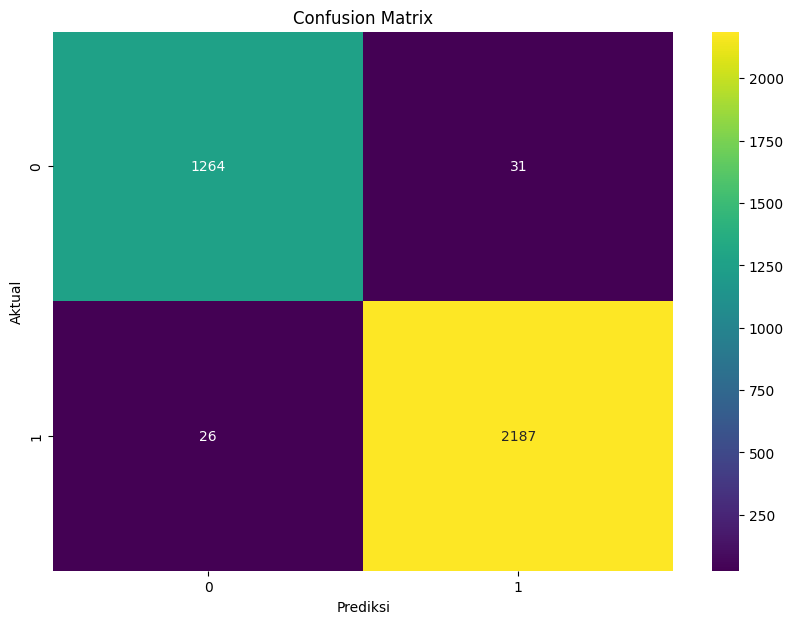

In [64]:
# Visualisasi Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [48]:
# Menyimpan model ke dalam file menggunakan pickle
with open('./models/dataset_2/dt_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

### 3. Naive Bayes

In [49]:
# Melakukan klasifikasi menggunakan Naive Bayes
nb = GaussianNB()
nb.fit(X_train.toarray(), y_train)
y_pred = nb.predict(X_test.toarray())

# Melakukan evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Menyimpan hasil classification report ke dalam file CSV
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('./data/classification_report_NB.csv')

Akurasi: 0.9019384264538198
                precision    recall  f1-score   support

Phishing Email       0.88      0.86      0.87      1295
    Safe Email       0.92      0.93      0.92      2213

      accuracy                           0.90      3508
     macro avg       0.90      0.89      0.89      3508
  weighted avg       0.90      0.90      0.90      3508



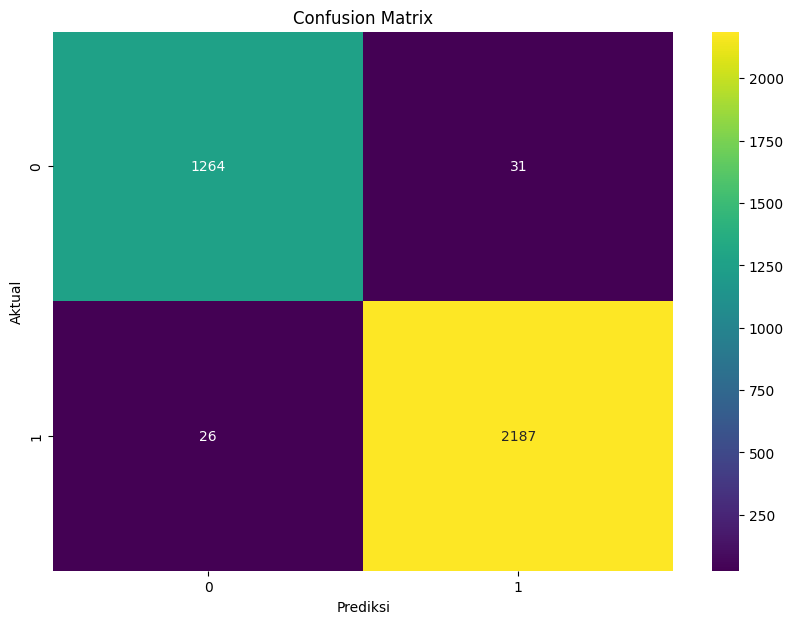

In [63]:
# Visualisasi Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [51]:
# Menyimpan model ke dalam file menggunakan pickle
with open('./models/dataset_2/nb_model.pkl', 'wb') as file:
    pickle.dump(nb, file)

### 4. Neural Network

In [52]:
# Melakukan klasifikasi menggunakan Neural Network
nn = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

# Melakukan evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Menyimpan hasil classification report ke dalam file CSV
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('./data/classification_report_NN.csv')

Akurasi: 0.983751425313569
                precision    recall  f1-score   support

Phishing Email       0.98      0.98      0.98      1295
    Safe Email       0.99      0.99      0.99      2213

      accuracy                           0.98      3508
     macro avg       0.98      0.98      0.98      3508
  weighted avg       0.98      0.98      0.98      3508



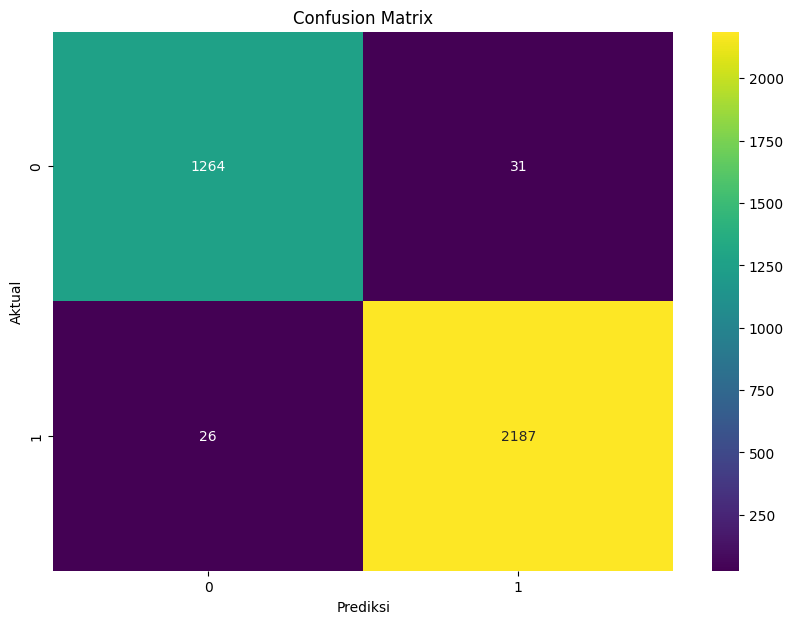

In [62]:
# Visualisasi Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [54]:
# Menyimpan model ke dalam file menggunakan pickle
with open('./models/dataset_2/nn_model.pkl', 'wb') as file:
    pickle.dump(nn, file)

### 5. Komparasi Antar Model

#### Komparasi Confussion Matrix dari Setiap Model

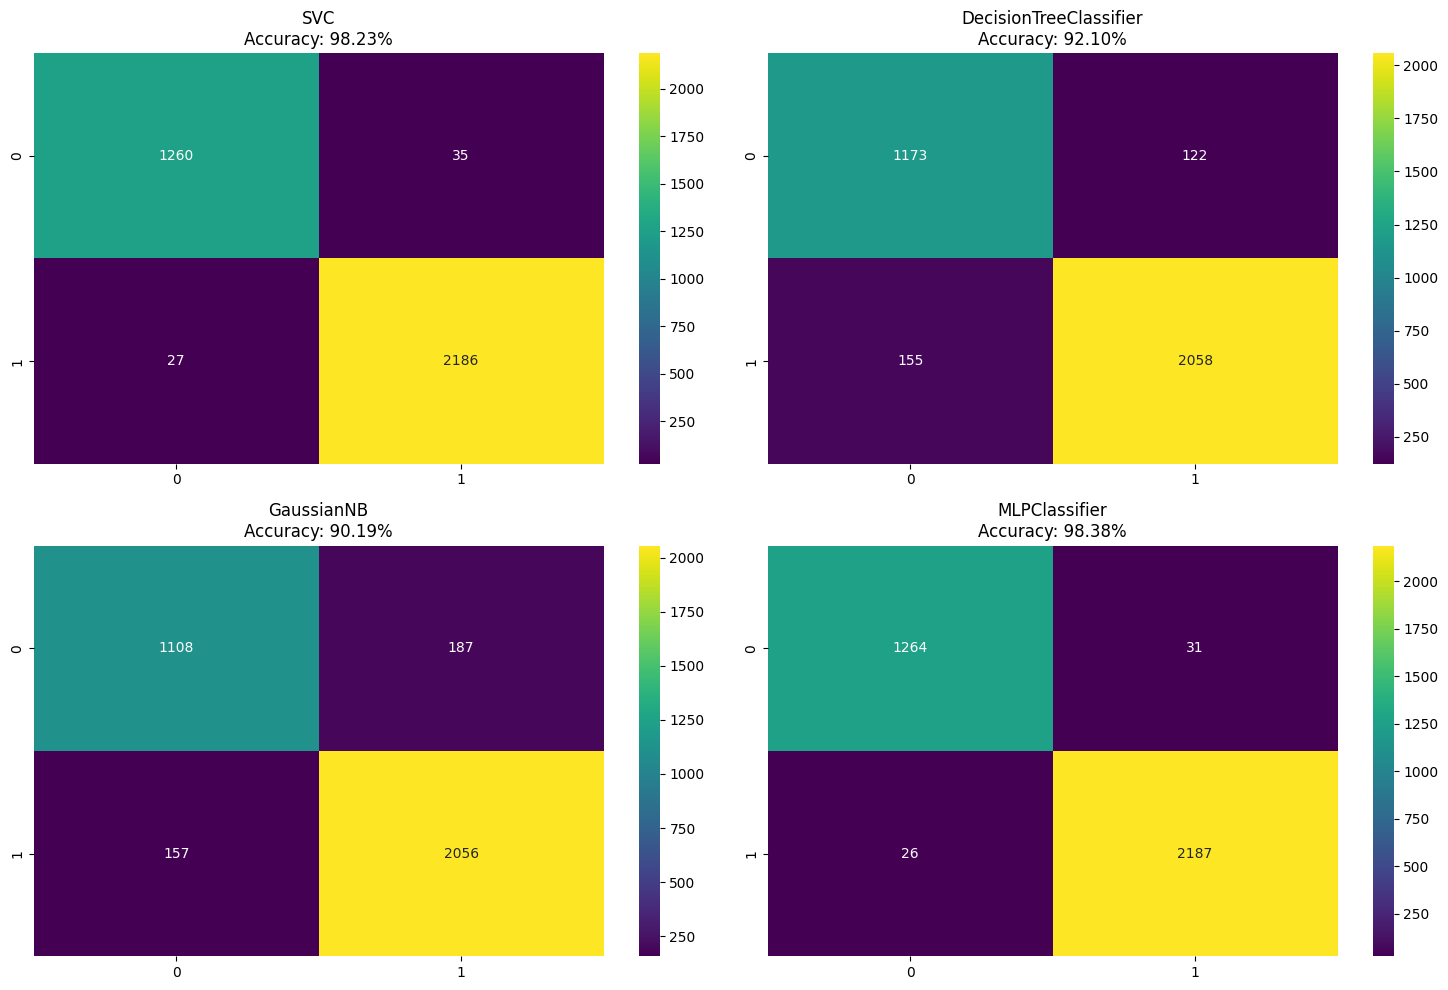

In [61]:
# Visualisasi confusion matrix untuk model SVM, DT, NB, dan NN untuk Perbandingan
def plot_confusion_matrix(models, X_test, y_test):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    for i, model in enumerate(models):
        y_pred = model.predict(X_test.toarray())
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=axes[i])
        accuracy = accuracy_score(y_test, y_pred)
        axes[i].set_title(f'{model.__class__.__name__}\nAccuracy: {accuracy * 100:.2f}%')
    plt.tight_layout()
    plt.show()

models = [svm, dt, nb, nn]
plot_confusion_matrix(models, X_test, y_test)

#### Komparasi Akurasi dari Setiap Model

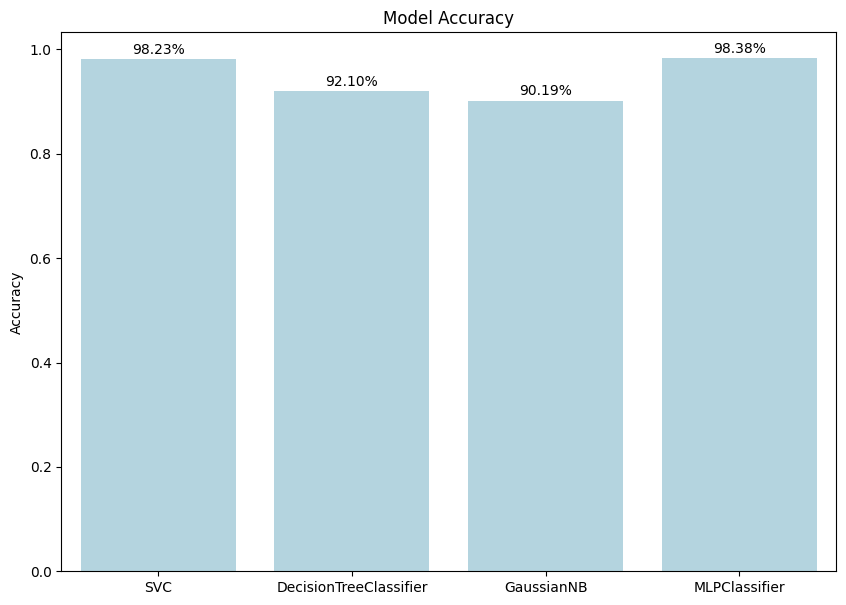

In [60]:
# Visualisasi Akurasi Model SVM, DT, NB, dan NN
def plot_accuracy(models, X_test, y_test):
    accuracy_scores = []
    for model in models:
        y_pred = model.predict(X_test.toarray())
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
    plt.figure(figsize=(10, 7))
    sns.barplot(x=[model.__class__.__name__ for model in models], y=accuracy_scores, color='lightblue')
    for i, accuracy in enumerate(accuracy_scores):
        plt.text(i, accuracy + 0.01, f'{accuracy * 100:.2f}%', ha='center')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.show()

plot_accuracy(models, X_test, y_test)

#### Mencetak Hasil Komparasi ke File CSV

In [57]:
# Convert classification report to CSV
svm_report = classification_report(y_test, svm.predict(X_test), output_dict=True)
svm_report_df = pd.DataFrame(svm_report).transpose()

dt_report = classification_report(y_test, dt.predict(X_test), output_dict=True)
dt_report_df = pd.DataFrame(dt_report).transpose()

nb_report = classification_report(y_test, nb.predict(X_test.toarray()), output_dict=True)
nb_report_df = pd.DataFrame(nb_report).transpose()

nn_report = classification_report(y_test, nn.predict(X_test), output_dict=True)
nn_report_df = pd.DataFrame(nn_report).transpose()

final_report = pd.concat([svm_report_df, dt_report_df, nb_report_df, nn_report_df], keys=['SVM', 'DT', 'NB', 'NN'])
final_report.to_csv('./results/dataset_2/comparison.csv')

# Mengubah hasil comparision.csv menjadi 2 digit di belakang koma
final_report = pd.read_csv('./results/dataset_2/comparison.csv', index_col=[0, 1])
final_report = final_report.round(2)
final_report.to_csv('./results/dataset_2/comparison.csv')

## Prediksi Menggunakan Model

In [58]:
# Membuat Prediksi Menggunakan masing-masing Model
def predict_email(email_text, model):
    email_text = preprocess_text(email_text)
    email_text = tfidf.transform([email_text])
    if isinstance(model, GaussianNB):
        email_text = email_text.toarray()
    prediction = model.predict(email_text)
    return prediction[0]

email_text = """
Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.

"""
svm_prediction = predict_email(email_text, svm)
dt_prediction = predict_email(email_text, dt)
nb_prediction = predict_email(email_text, nb)
nn_prediction = predict_email(email_text, nn)

print(f"Email Text: {email_text}")
print(f"SVM Prediction: {svm_prediction}")
print(f"Decision Tree Prediction: {dt_prediction}")
print(f"Naive Bayes Prediction: {nb_prediction}")
print(f"Neural Network Prediction: {nn_prediction}")

Email Text: 
Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.


SVM Prediction: Phishing Email
Decision Tree Prediction: Phishing Email
Naive Bayes Prediction: Phishing Email
Neural Network Prediction: Phishing Email
